<a href="https://colab.research.google.com/github/Meghna8124/Image-Classification-Using-Deep-Learning/blob/master/Benedict_notBenedict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
import os
import io
import tarfile

import PIL

import boto3

from fastai.vision import *

In [4]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
bs=64
img_size=299

In [0]:
path = 'drive/My Drive/Data'
data = ImageDataBunch.from_folder(path, ds_tfms=get_transforms(),
                                   size=img_size, bs=bs//2).normalize(imagenet_stats)

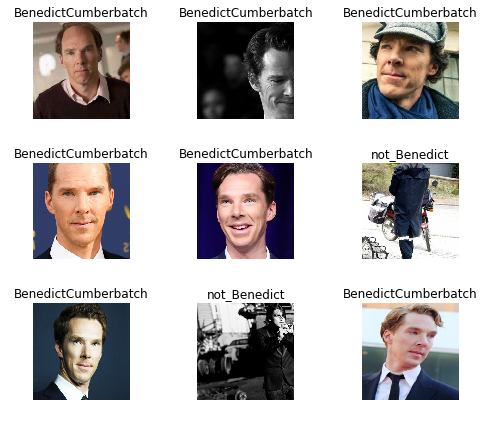

In [8]:
data.show_batch(rows = 3, figsize = (7, 6))

In [9]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:01<00:00, 84609072.45it/s]


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


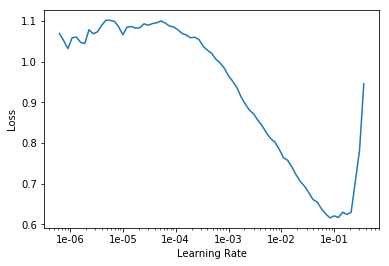

In [10]:
learn.lr_find()
learn.recorder.plot()

In [11]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.987165,0.575094,0.224138,00:22
1,0.656772,0.438886,0.155172,00:10
2,0.507862,0.494068,0.172414,00:11
3,0.404858,0.430114,0.103448,00:10


In [13]:
learn.save('stage-1')
learn.unfreeze()
learn.fit_one_cycle(4, max_lr=slice(1e-6,1e-4))

NameError: ignored

In [14]:
learn.load('stage-1')
learn.unfreeze()
learn.fit_one_cycle(4, max_lr=slice(3e-5,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.173815,0.421669,0.120690,00:10
1,0.113876,0.322602,0.103448,00:10
2,0.092661,0.313679,0.103448,00:10
3,0.093221,0.289514,0.068966,00:10


In [0]:
learn.save('stage-2')

In [0]:
preds,y,losses = learn.get_preds(with_loss=True)
interp = ClassificationInterpretation(learn, preds, y, losses)

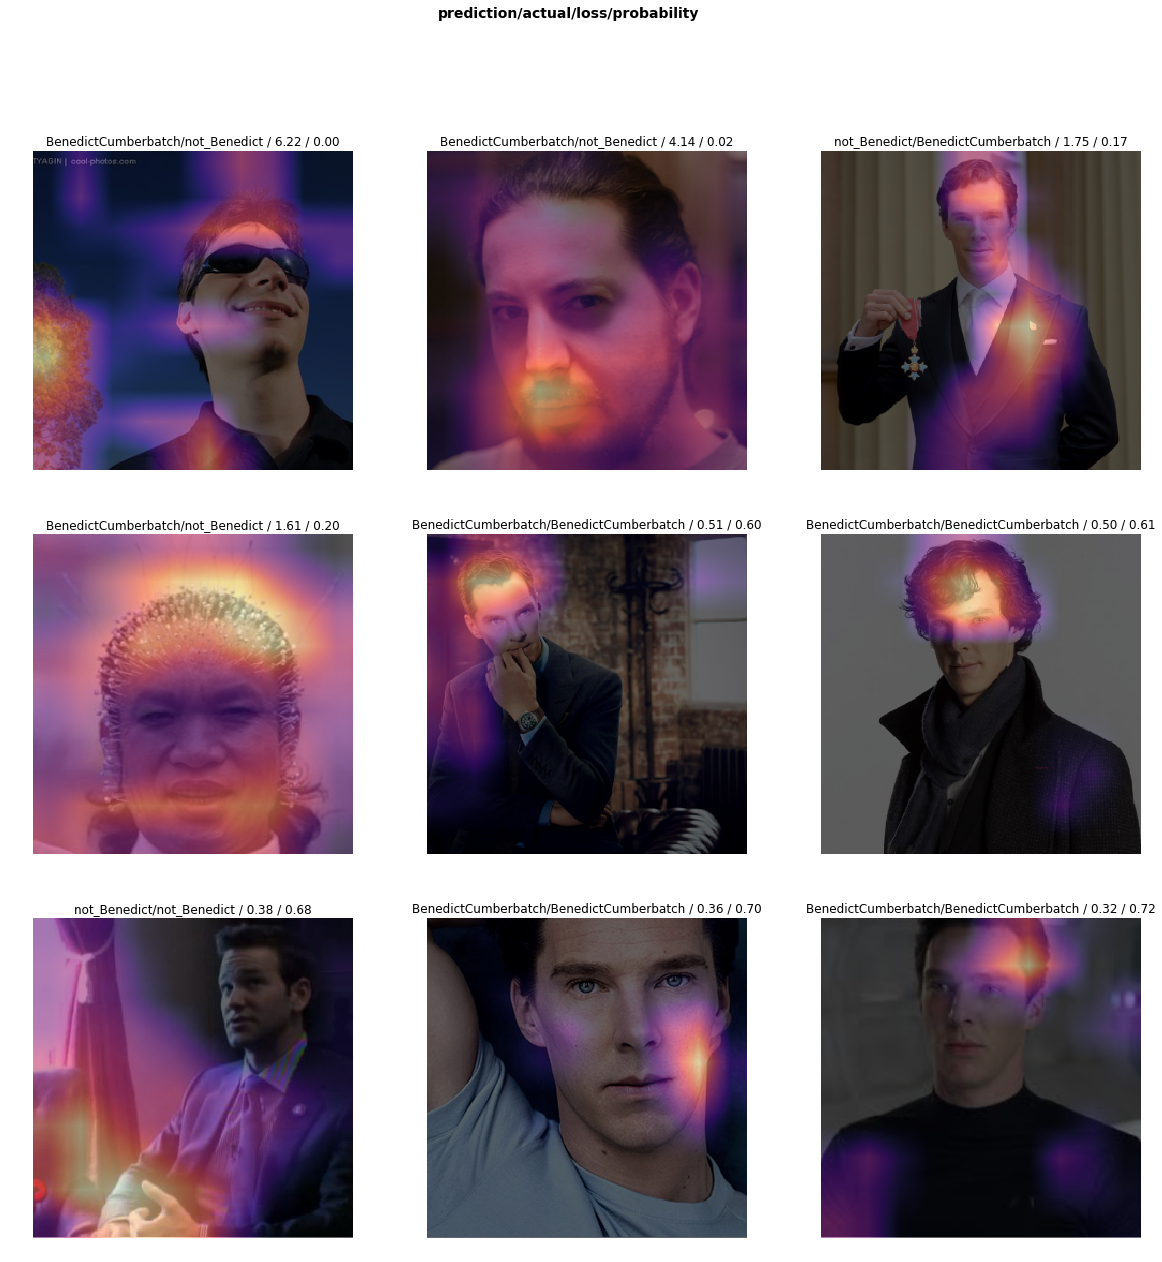

In [18]:
interp.plot_top_losses(9, figsize=(20,20))

In [19]:
interp.confusion_matrix()

array([[27,  1],
       [ 3, 27]])